# STL

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')

级别，趋势，季节和残差

第一步：确定季节周期的长度

第二步：隔离趋势

第三步：隔离季节性+噪音

第四步：分离季节性

第五步：隔离噪音


相关的网址

https://towardsdatascience.com/what-is-time-series-decomposition-and-how-does-it-work-9b67e007ae90  STL

https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051 ARIMA

https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7    选择加法还是乘法

https://medium.com/quantjam/introduction-to-time-series-trend-decomposition-with-python-b54a29f8e038




In [75]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [76]:
co2=pd.read_excel('E:/SCA/SCA_20_40c.csv')  
co2=co2['SCA']
co2.describe()

count    2.400000e+02
mean     1.851005e+06
std      1.261531e+06
min      4.040578e+05
25%      7.782994e+05
50%      1.455285e+06
75%      2.816014e+06
max      5.487588e+06
Name: SCA, dtype: float64

In [77]:
beginDate = '2000-10-01'
endDate = '2019-09-01'


date_index = pd.date_range(beginDate, endDate)
days = [pd.Timestamp(x).strftime("%Y-%m-%d") for x in date_index.values]

tmp = []
for index , v in enumerate(days):
    if index == len(days)-1:
        tmp.append(days[index])
    if index == 0:
        tmp.append(days[0])
    else:
        _ = v.split('-')[2]
        if _ == '01':
#             tmp.append(days[index-1])
            tmp.append(days[index])

print(tmp)


['2000-10-01', '2000-11-01', '2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01', '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01', '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01', '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01', '2006

seasonal_decompose()  这个函数 也可以做时间 序列分析

In [78]:

# co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
#        315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
#        314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
#        318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
#        321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
#        320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
#        319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
#        317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
#        318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
#        322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
#        324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
#        323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
#        323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
#        322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
#        323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
#        327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
#        330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
#        330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
#        329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
#        328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
#        328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
#        333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
#        336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
#        336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
#        335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
#        335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
#        335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
#        340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
#        343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
#        343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
#        343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
#        342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
#        342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
#        347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
#        351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]

# co2 = pd.Series(co2, index=pd.date_range('1-1-1959', periods=len(co2), freq='M'), name = 'CO2')
co2 = pd.Series(co2, index=pd.date_range('10-1-2000', periods=len(co2), freq='31D'), name = 'SCA')
co2 = pd.Series(co2, index=tmp, name = 'SCA')
co2.describe()
co2

2000-10-01   NaN
2000-11-01   NaN
2000-12-01   NaN
2001-01-01   NaN
2001-02-01   NaN
              ..
2019-06-01   NaN
2019-07-01   NaN
2019-08-01   NaN
2019-09-01   NaN
2019-09-01   NaN
Name: SCA, Length: 229, dtype: float64

In [79]:
co2.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SCA, dtype: float64

默认seasonal 是7 

In [80]:
from statsmodels.tsa.seasonal import STL  # 这里直接调用了STL
stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()
#  这里直接的显示年份是正常的 为什么呢

ValueError: Unable to determine period from endog

Robust Fitting  模型容忍较大的误差

In [474]:
from statsmodels.datasets import elec_equip as ds
elec_equip = ds.load(as_pandas=True).data

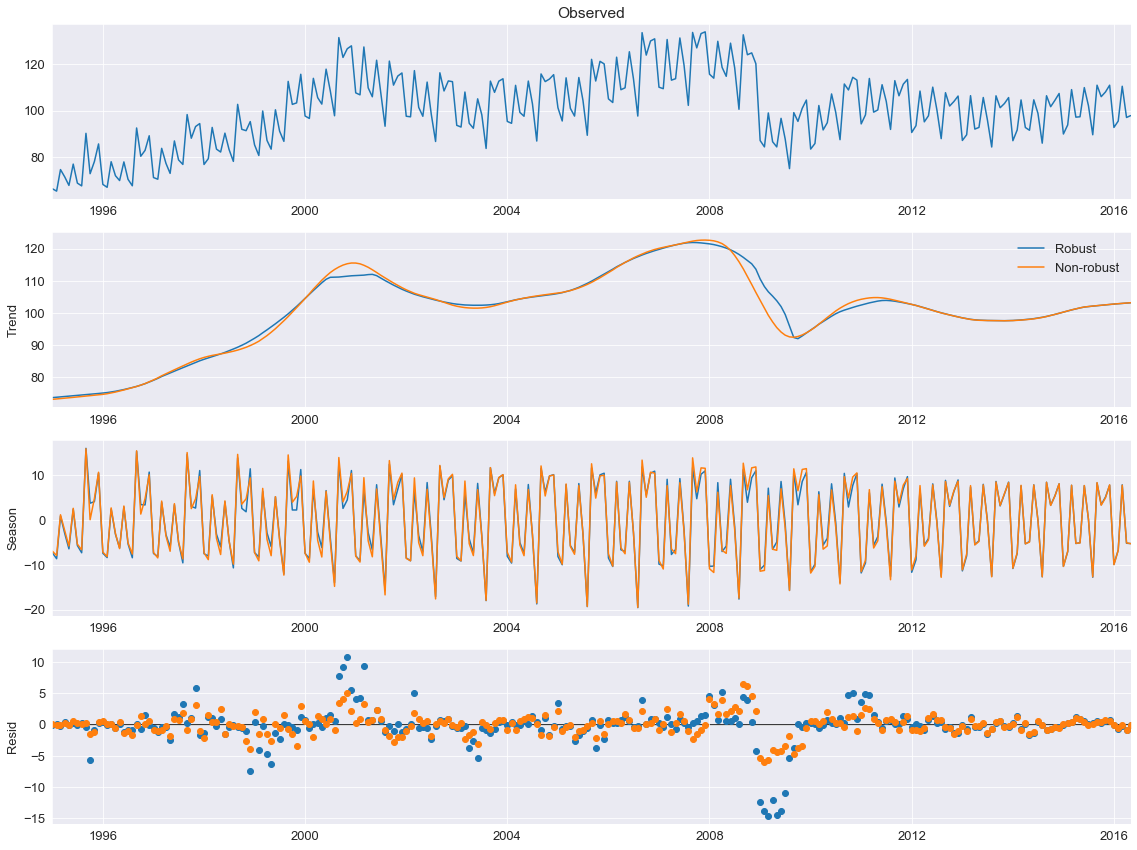

In [475]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)


stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ['Robust','Non-robust'])

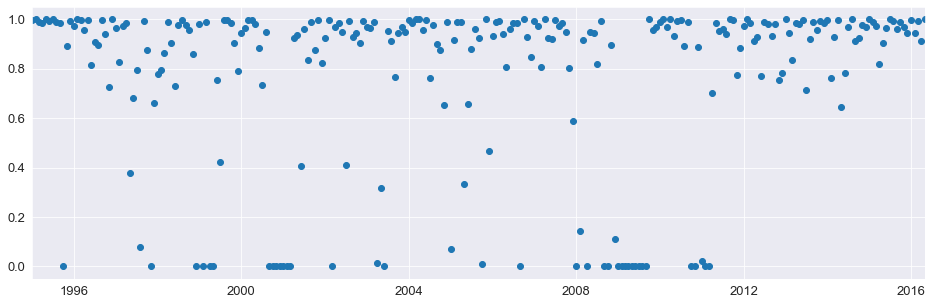

In [476]:
fig = plt.figure(figsize=(16,5))
lines = plt.plot(res_robust.weights, marker='o', linestyle='none')
ax = plt.gca()
xlim = ax.set_xlim(elec_equip.index[0], elec_equip.index[-1])

LOESS degree

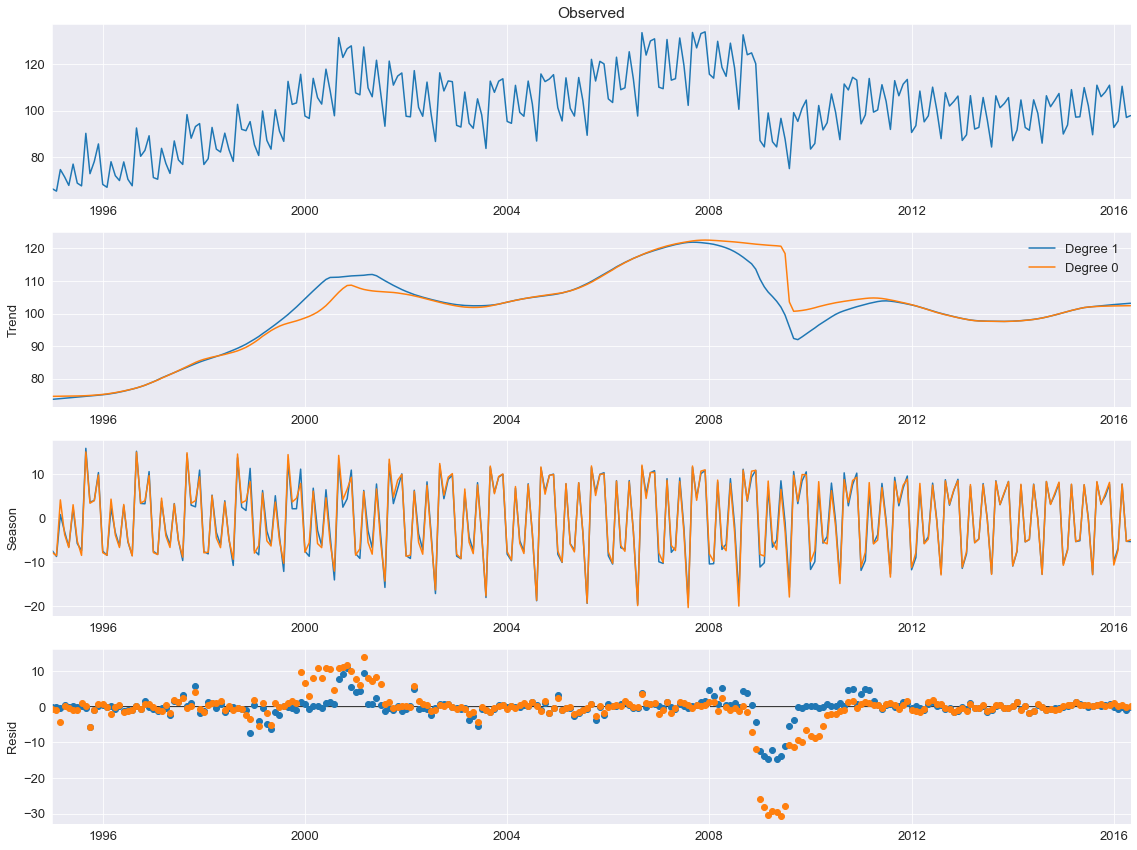

In [477]:
stl = STL(elec_equip, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
res_deg_0 = stl.fit()
fig = res_robust.plot()
add_stl_plot(fig, res_deg_0, ['Degree 1','Degree 0'])

Performance   使用具有低频余弦趋势和正弦季节性模式的模拟数据将计算成本降低15倍。


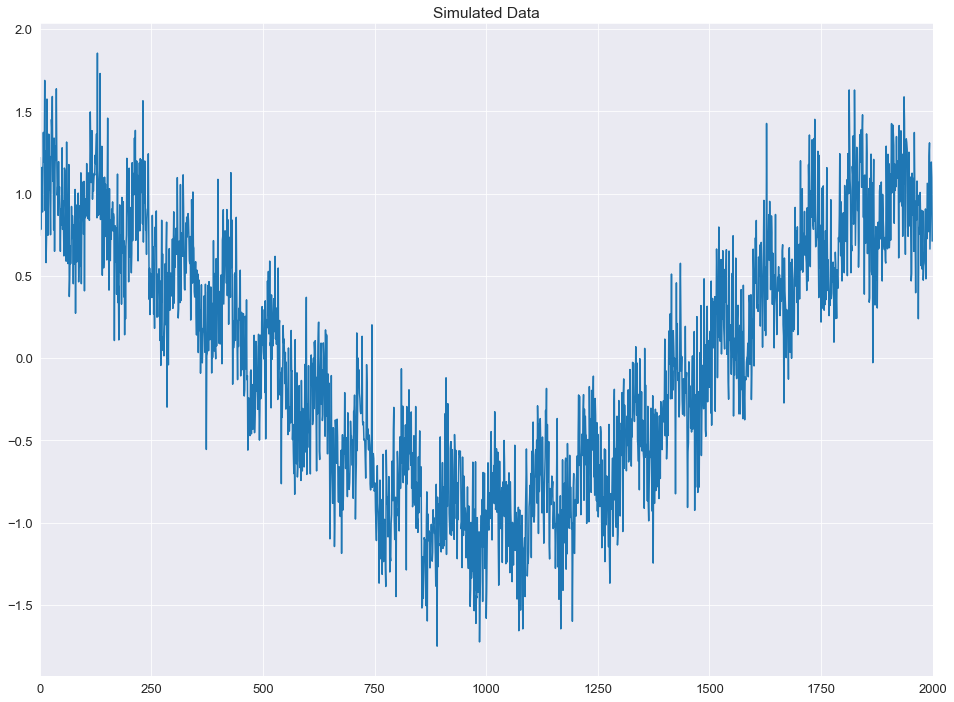

In [478]:
import numpy as np
rs = np.random.RandomState(0xA4FD94BC)
tau = 2000
t = np.arange(tau)
period = int(0.05 * tau)
seasonal = period + ((period % 2) == 0)  # Ensure odd
e = .25*rs.standard_normal(tau)
y = np.cos(t / tau * 2 * np.pi) + 0.25 * np.sin(t / period * 2 * np.pi) + e
plt.plot(y)
plt.title('Simulated Data')
xlim = plt.gca().set_xlim(0, tau)

模拟数据

373 ms ± 4.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


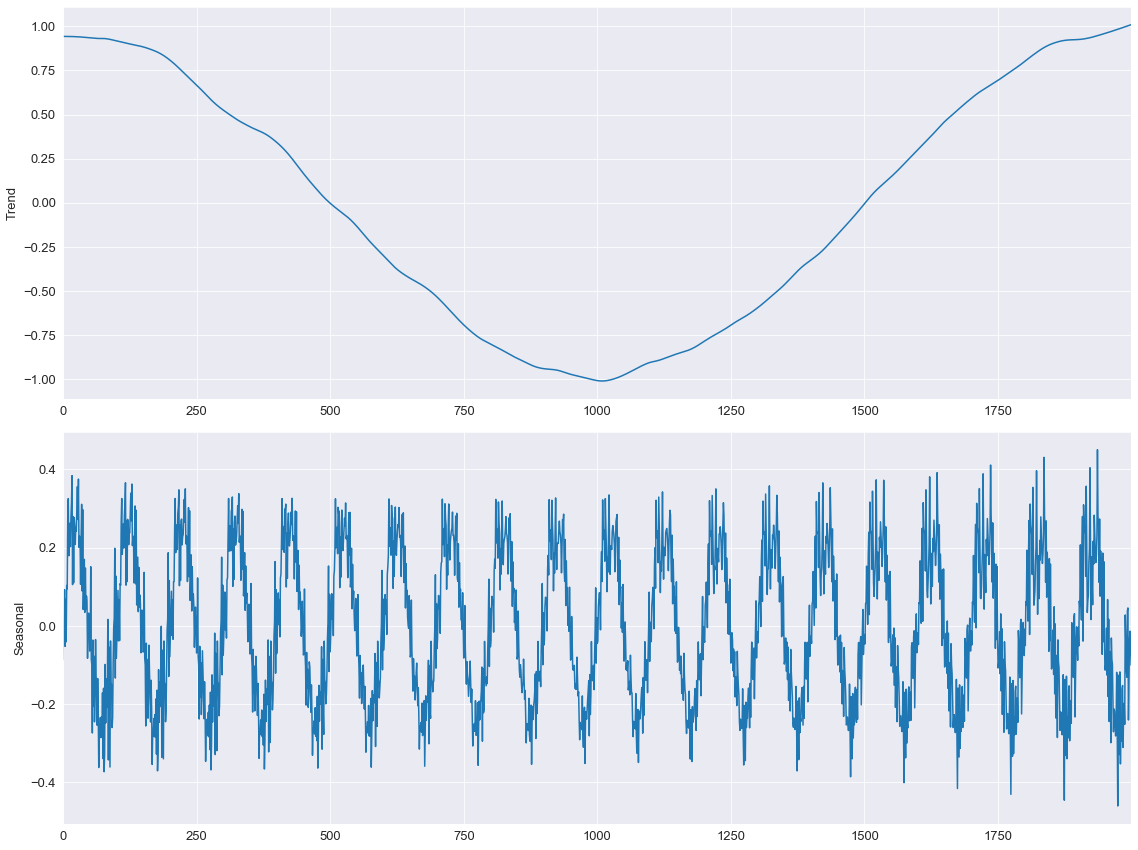

In [479]:
mod = STL(y, period=period, seasonal=seasonal)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

跳转全部设置为其窗口长度的15％。有限的线性插值对模型的拟合几乎没有影响。

25.2 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


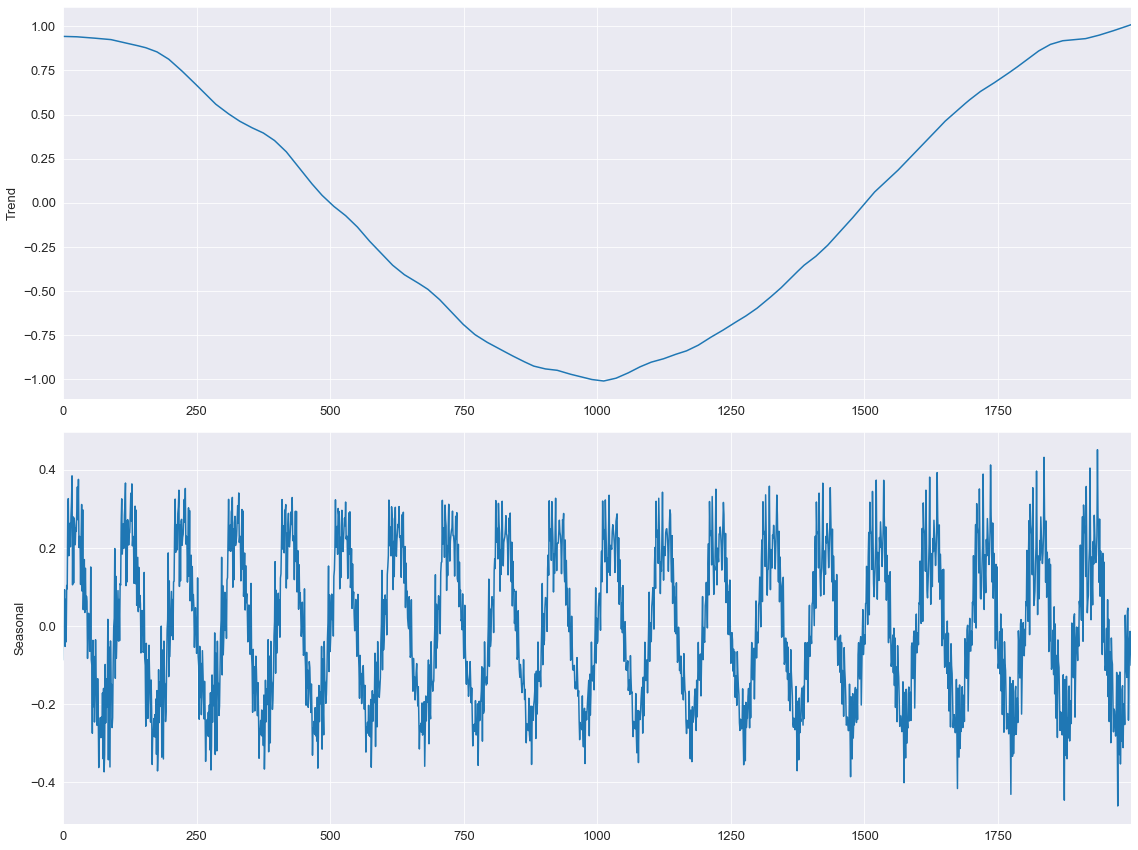

In [480]:
low_pass_jump = seasonal_jump = int(0.15 * (period + 1))
trend_jump = int(0.15 * 1.5 * (period + 1))
mod = STL(y, period=period, seasonal=seasonal, seasonal_jump=seasonal_jump,
          trend_jump=trend_jump, low_pass_jump=low_pass_jump)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

简化了使用STL消除季节性因素，然后使用标准时间序列模型预测趋势和周期性成分的过程。

在这里，我们使用STL处理季节性，然后使用ARIMA（1,1,0）来建模反季节数据   预测会自动将季节性成分预测添加到ARIMA预测中。

Forecasting with STL

ARIMA  差分整合移动平均自回归模型

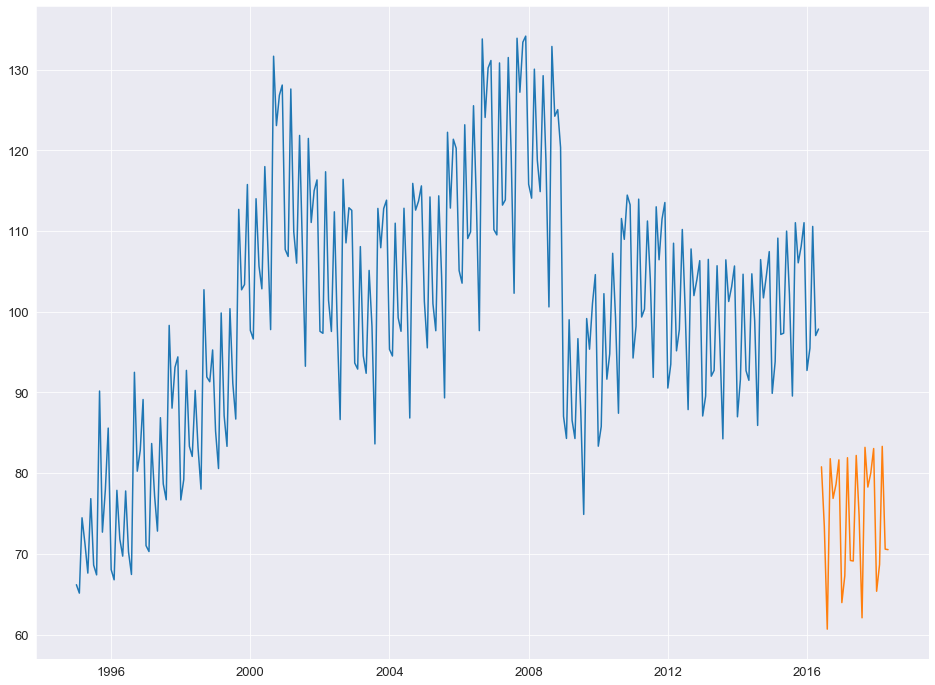

In [481]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1,1,0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.show()

In [482]:
print(stlf_res.summary())


# 这里的好处是有相关的统计系数 R P
# 还有置信度什么的
# 很多自定义的季节趋势模型  当然还有准确率来定量的衡量 model  就是一个预测的过程

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  257
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -522.434
Date:                Thu, 18 Mar 2021   AIC                           1050.868
Time:                        16:38:42   BIC                           1061.504
Sample:                    01-01-1995   HQIC                          1055.146
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1171      0.118      0.995      0.320      -0.113       0.348
ar.L1         -0.0435      0.049     -0.880      0.379      -0.140       0.053
sigma2         3.4682      0.188     18.406      0.0

----------------

第二个 例子

In [222]:
#-*- coding: utf-8 -*-
import  pandas as pd
from matplotlib import pyplot
#series = read_csv('E:/SCA/SCA_20_40.xls', header=0, index_col=0)
# 懂了 数据的问题 ,encoding='ISO-8859-1'
series = pd.read_excel('F:/paper data/SCA_20_40.xls')
series.plot()
pyplot.show()


FileNotFoundError: [Errno 2] No such file or directory: 'F:/paper data/SCA_20_40.xls'

In [20]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('F:/paper data/SCA_20_40.xls', encoding='ISO-8859-1',header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative', header=0)
result.plot()
pyplot.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [86]:
import  pandas  as pd
df=pd.read_excel('E:/SCA/SCA_20_40c.csv')  
# read excel  也可以read csv
data=df.head()
data

,DATE,SCA
0,2000-10-01,1026482.932
1,2000-11-01,2404673.616
2,2000-12-01,3498284.841
3,2001-01-01,4800014.228
4,2001-02-01,3583594.839


---------------------------
第三个例子

https://towardsdatascience.com/what-is-time-series-decomposition-and-how-does-it-work-9b67e007ae90  

In [446]:
# -*- coding: gbk -*-
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
pyplot.rc('figure',figsize=(20,7))
pyplot.rc('font',size=13)
#mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')
#df = pd.read_csv('E:/SCA/SCA_20_40u.xls',encoding='gb18030', errors='ignore', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)
#df = pd.read_excel('E:/SCA/SCA_20_40c.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)
df=pd.read_excel('E:/SCA/SCA_20_40c.csv', header=0)    # header =0  是去掉表头的 
df['xdate']=df['DATE']
df['xdate']=df['xdate'].dt.strftime('%Y-%m')
df['DATE']=df['DATE'].dt.strftime('%d-%m-%Y')
df['DATE']

0      01-10-2000
1      01-11-2000
2      01-12-2000
3      01-01-2001
4      01-02-2001
          ...    
235    01-05-2020
236    01-06-2020
237    01-07-2020
238    01-08-2020
239    01-09-2020
Name: DATE, Length: 240, dtype: object

In [447]:
df
print(df.index) 
#df.set_index("DATE", drop=False)  #  drop=False 表示保留原先"YY"列的数据。
df['MONTH']=df['DATE'].str[3:5].astype(np.int)
df.set_index('MONTH')


RangeIndex(start=0, stop=240, step=1)


,DATE,SCA,xdate
MONTH,,,
10,01-10-2000,1.026483e+06,2000-10
11,01-11-2000,2.404674e+06,2000-11
12,01-12-2000,3.498285e+06,2000-12
1,01-01-2001,4.800014e+06,2001-01
2,01-02-2001,3.583595e+06,2001-02
...,...,...,...
5,01-05-2020,1.316826e+06,2020-05
6,01-06-2020,7.800036e+05,2020-06
7,01-07-2020,4.633122e+05,2020-07


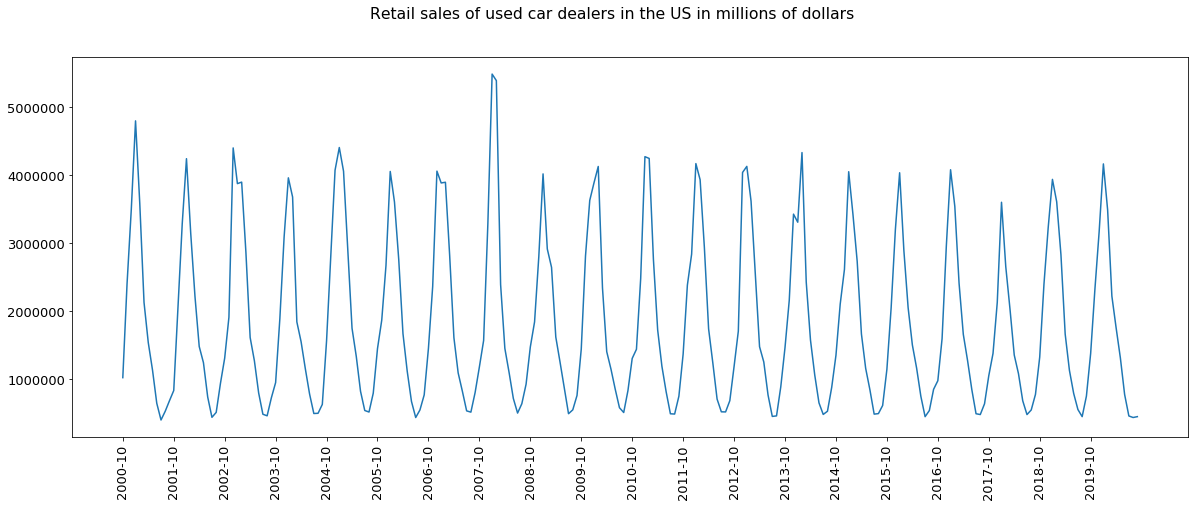

In [448]:
fig = plt.figure()
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
#df['SCA'].plot()
ind=np.arange(len(df['DATE']))
ax1 = fig.add_subplot(1,1,1)
#ax1.xaxis.set_major_formatter(mdate.DateFormatter('%YYYY-%mm'))#设置时间标签显示格式

plt.plot(df['xdate'],df['SCA'])
#plt.xticks(ind[::12],pd.date_range('2000-10','2019-09'),rotation=90) 
#plt.xticks(ind[::12],pd.date_range('2000','2020'),rotation=90) 

plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()

Moving average 

In [449]:
#add a column containing a 2 x 12 centered moving average. this column will capture the trend component in the time series
df['2 x 12 CMA (TREND)'] = np.nan

# 计算中心移动平均值  central moving average

In [450]:
for i in range(6,df['SCA'].size-6):
    df['2 x 12 CMA (TREND)'][i] = np.round(
        df['SCA'][i - 6] * 1.0 / 24 + 
        (
            df['SCA'][i - 5] + 
            df['SCA'][i - 4] + 
            df['SCA'][i - 3] + 
            df['SCA'][i - 2] + 
            df['SCA'][i - 1] + 
            df['SCA'][i] + 
            df['SCA'][i + 1] + 
            df['SCA'][i + 2] + 
            df['SCA'][i + 3] + 
            df['SCA'][i + 4] + 
            df['SCA'][i + 5]
        ) * 1.0 / 12 + 
        df['SCA'][i + 6] * 1.0 / 24)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


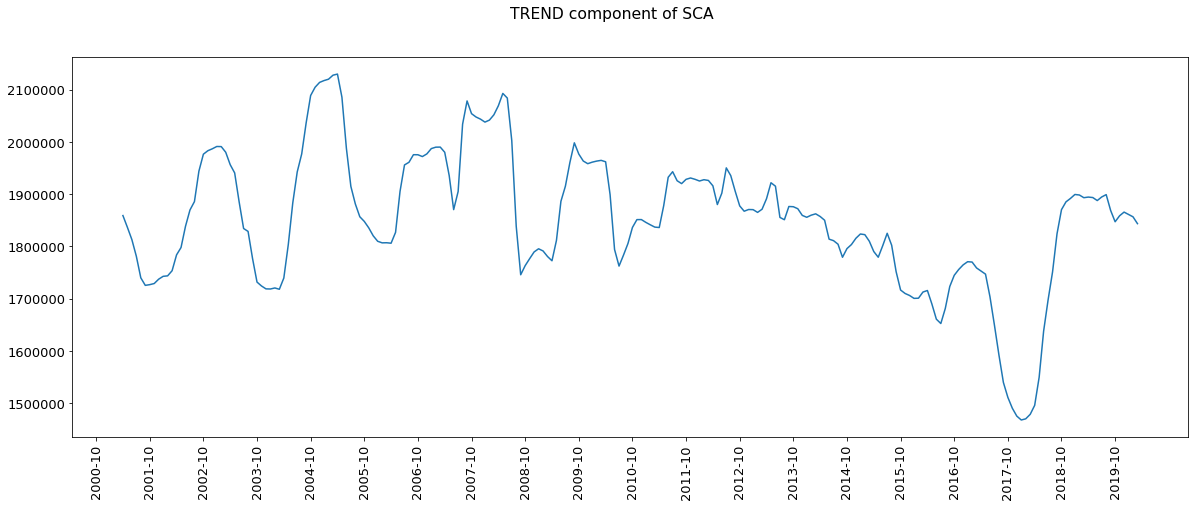

In [451]:

fig = plt.figure()
fig.suptitle('TREND component of SCA')
#df['2 x 12 CMA (TREND)'].plot()
plt.plot(df['xdate'],df['2 x 12 CMA (TREND)'])
plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()
# 突出了SCA的趋势

In [452]:
# 根据合成是乘法还是加法，我们需要从原始时间序列中除以或减去趋势分量来检索季节性和噪声分量
# 时间序列值=趋势分量*季节分量*噪声分量
df['SEASONALITY AND NOISE'] = df['SCA']/df['2 x 12 CMA (TREND)']
# 季节分量*噪声分量=时间序列值/趋势分量


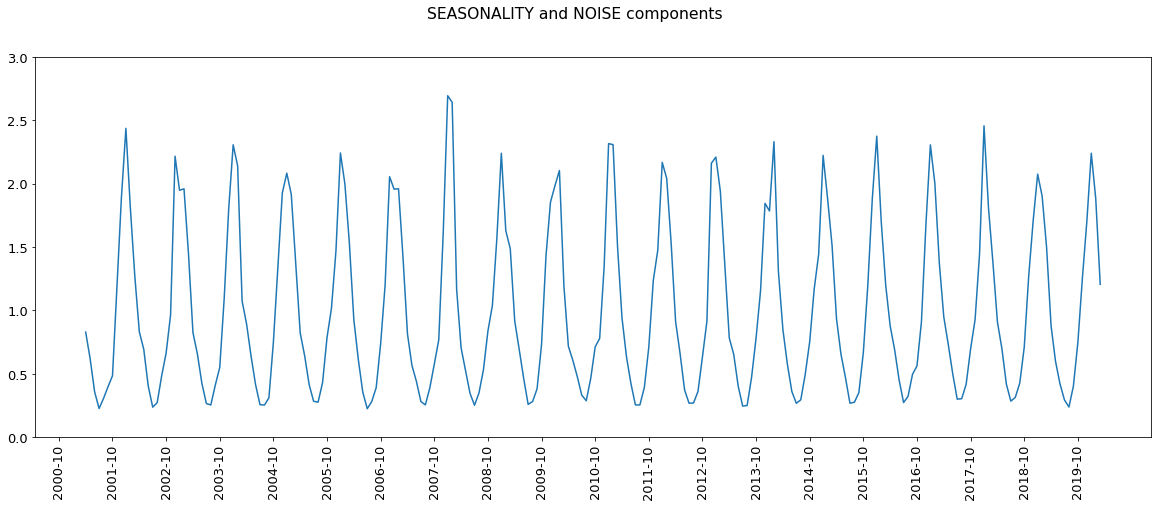

In [453]:
#plot the seasonality and noise components
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 3.0)
plt.plot(df['xdate'],df['SEASONALITY AND NOISE'])
#df['SEASONALITY AND NOISE'].plot()
plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()

In [454]:
# 接下来，我们将通过计算所有一月、二月、三月的季节性分量的平均值，从季节性和噪声的混合中得到“纯”季节性分量
#calculate the average seasonal component for each month

#first add a month column
#df['MONTH']=df['DATE'].str[3:5].astype(np.int)

#initialize the month based dictionaries to store the running total of themonth wise  seasonal sums and counts
average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}


In [455]:
#calculate the sums and counts
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'][i]) is False:
        average_seasonal_values[df['MONTH'][i]] = average_seasonal_values[df['MONTH'][i]] + df['SEASONALITY AND NOISE'][i]
        average_seasonal_value_counts[df['MONTH'][i]] = average_seasonal_value_counts[df['MONTH'][i]] + 1

#calculate the average seasonal component for each month
for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]

#create a new column in the data frame and fill it with the value of the average seasonal component for the corresponding month
df['SEASONALITY'] = np.nan
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'][i]) is False:
        df['SEASONALITY'][i] = average_seasonal_values[df['MONTH'][i]]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


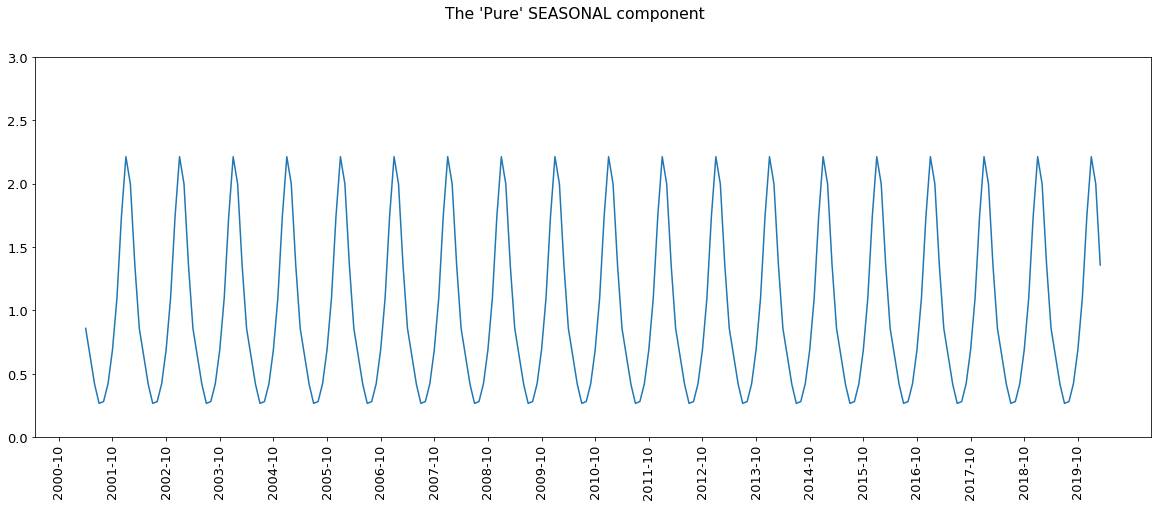

In [456]:
#plot the seasonal component
fig = plt.figure()
fig.suptitle('The \'Pure\' SEASONAL component')
plt.ylim(0,3.0)
#df['SEASONALITY'].plot()
plt.plot(df['xdate'],df['SEASONALITY'])
plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()


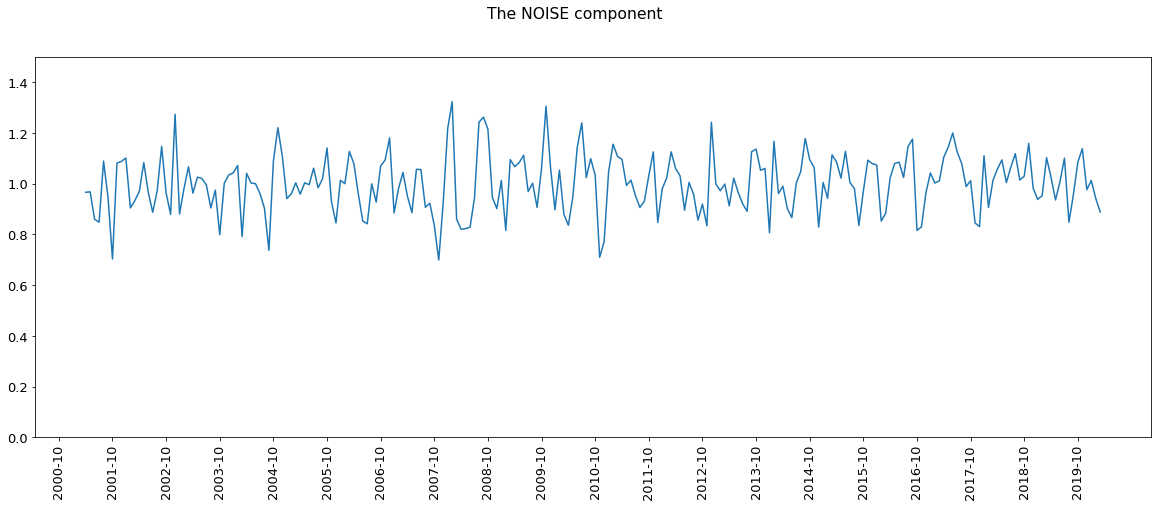

In [457]:
# 最后，我们将用平均的季节值来划分我们以前孤立的噪声季节值，以产生每个月的噪声分量。
# 噪声分量=噪声季节分量/平均季节分量   noise component = noisy seasonal component / averaged out seasonal component
df['NOISE'] = df['SEASONALITY AND NOISE']/df['SEASONALITY']

#plot the seasonal component
fig = plt.figure()
fig.suptitle('The NOISE component')
plt.ylim(0, 1.5)
#df['NOISE'].plot()
plt.plot(df['xdate'],df['NOISE'])
plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


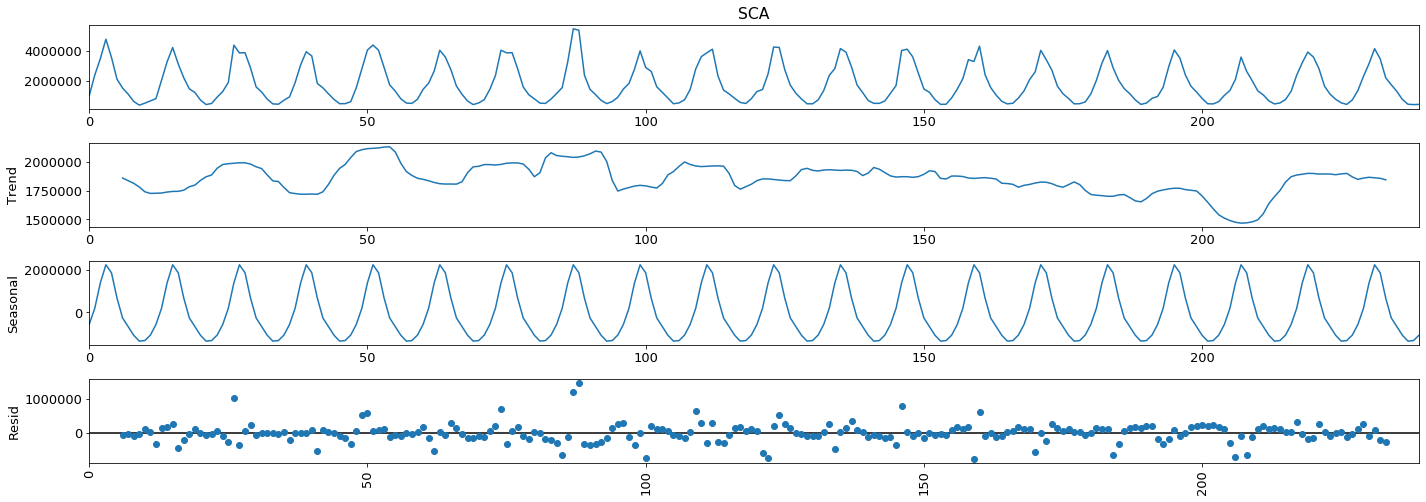

In [464]:

#  statsmodels.tsa.seasonal.STL 为什么没有用这个呢
#Do all of the above using  one line of code!
from statsmodels.tsa.seasonal import seasonal_decompose
#components = seasonal_decompose(df['SCA'], model='multiplicative')
components = seasonal_decompose(df['SCA'], freq=12,model='additive')
#  这个频率的意义是什么
components.plot()
#plt.xticks(range(0,240,12))
plt.xticks(rotation=90)
plt.show()


In [462]:

    
from datetime import datetime
start_date=datetime(2000,10,1)
end_date=datetime(2019,9,30)
df[(start_date<=df.index)&(df.indedx<=end_date)].plot(grid=True)

TypeError: '>=' not supported between instances of 'int' and 'datetime.datetime'

搞一下  这个STL时间显示的问题 
seasonal_decompose model  是什么 加法模型 乘法模型
period:int, optional，系列的时期。如果x不是pandas对象或x的索引没有频率，则必须使用。如果x是具有时间序列索引的pandas对象，则覆盖x的默认周期性。
extrapolate_trend：int or ‘freq’, optional，如果设置为> 0，则考虑到许多（+1）最接近的点，由卷积产生的趋势将在两端外推线性最小二乘法（如果two_side为False，则为单一个最小二乘）。如果设置为“频率”，请使用频率最近点。设置此参数将导致趋势或残油成分中没有NaN值。


长期趋势(Secular trend,T)，季节变动(Seasonal Variation,S)，循环波动(Cyclical Variation,C)，不规则波动(Irregular Variation,I):


有的还用差分方法 来消除趋势


So, how you should have noticed, we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. On other hand, in the additive model, the magnitude of seasonality does not change in relation to time.
            乘法 当季节的变化趋势 取决于数据的时候  即 乘法 有放大趋势的作用
加法 季节的变化不会随着时间 而变化

可以选择 一个总体的观感  即坐标为年  然后在选择一个月的坐标

然后下别的 数据
进行本地mk  test  
SCA-SDA
然后还有SCD-SDD

例子 4  这个直接就得出了

In [466]:
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = co2.load(True).data
data = data.resample('M').mean().ffill()

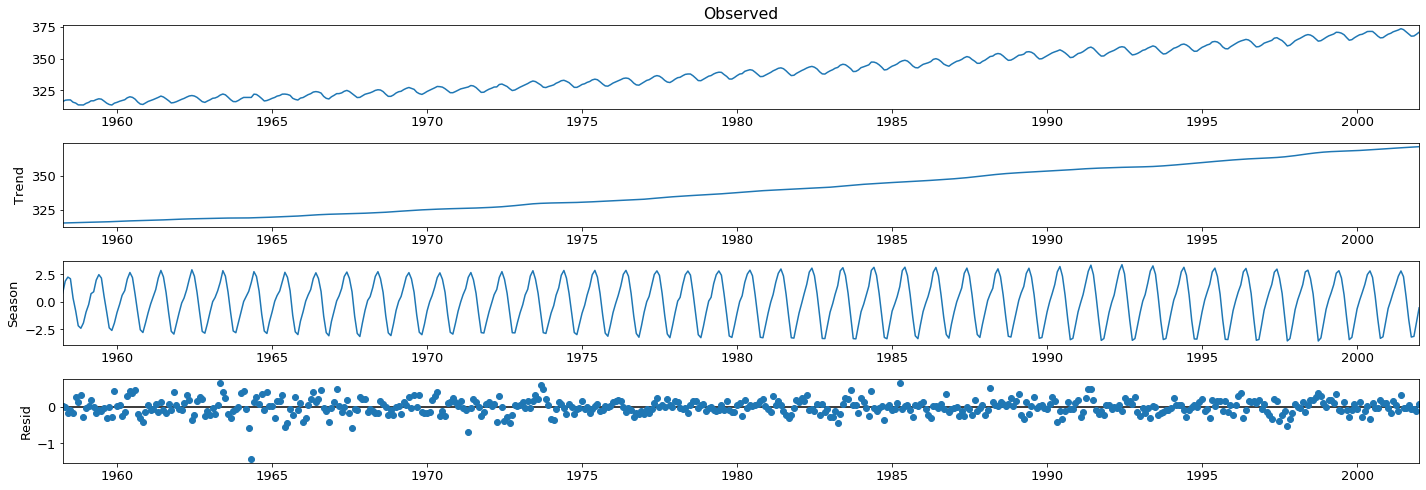

In [468]:
from statsmodels.tsa.seasonal import STL
res = STL(data).fit()
res.plot()
plt.show()

例子5

In [489]:
import pandas as pd
df=pd.read_excel('E:/SCA/SCA_20_40c.csv', header=0)   
df.reset_index(inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')


In [490]:
df_agg = df_agg.set_index('DATE')

df_agg.index
# 这里没有搞懂 

NameError: name 'df_agg' is not defined

In [ ]:
df_agg = df.groupby('Date')['Process'].sum()

In [ ]:
y = df_agg[‘Process’].resample(‘M’).sum()

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()

-----------------------------

例子6

In [491]:
# from statsmodels.tsa.seasonal import STL 
# res = STL(nat_gas['Price (Dollars per Million Btu)'],seasonal=13,period=12).fit()  # seasonal  是奇数  period 是12 
# ax=res.plot()  
# plt.show()

---------------------

例子 7

In [16]:
#  https://www.cnblogs.com/en-heng/p/7390310.html

def seasonal_decompose(x, model="additive", filt=None, freq=None, two_sided=True):    
    _pandas_wrapper, pfreq = _maybe_get_pandas_wrapper_freq(x)
    x = np.asanyarray(x).squeeze()
    nobs = len(x)
    ...
    if filt is None:        
        if freq % 2 == 0:  # split weights at ends            
            filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
        else:
            filt = np.repeat(1./freq, freq)

    nsides = int(two_sided) + 1
    # Linear filtering via convolution. Centered and backward displaced moving weighted average.
    trend = convolution_filter(x, filt, nsides)
    if model.startswith('m'):
        detrended = x / trend
    else:
        detrended = x - trend

    period_averages = seasonal_mean(detrended, freq)

    if model.startswith('m'):
        period_averages /= np.mean(period_averages)
    else:
        period_averages -= np.mean(period_averages)

    seasonal = np.tile(period_averages, nobs // freq + 1)[:nobs]

    if model.startswith('m'):
        resid = x / seasonal / trend
    else:
        resid = detrended - seasonal

    results = lmap(_pandas_wrapper, [seasonal, trend, resid, x])
    return DecomposeResult(seasonal=results[0], trend=results[1],
                           resid=results[2], observed=results[3])



In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
#from dateutils import get_gran, format_timestam
#from dateutil import  format_timestamp
from datetime import datetime
from dateutil.parser import parse

dta = pd.read_excel('E:/SCA/SCA_20_40c.csv',
                                   usecols=['DATE', 'SCA'])
#dta = format_timestamp(dta)
dta = datetime.timestamp(dta)
dta = dta.set_index('timestamp')
dta['value'] = dta['value'].apply(pd.to_numeric, errors='ignore')
dta.value.interpolate(inplace=True)
res = sm.tsa.seasonal_decompose(dta.value, freq=288)
res.plot()
plt.show()

# 这个 时间戳有问题  啊

TypeError: descriptor 'timestamp' requires a 'datetime.datetime' object but received a 'DataFrame'

例子  8   时间序列异常检测算法S-H-ESD

将ESD运用于STL分解后的余项分量中，即可得到时间序列上的异常点。但是，我们会发现在余项分量中存在着部分假异常点（spurious anomalies）
https://www.cnblogs.com/en-heng/p/9202654.html

https://www.biaodianfu.com/timeseries-anomaly-detection.html

https://github.com/nachonavarro/seasonal-esd-anomaly-detection S-ESD

S_H-ESD https://github.com/zrnsm/pyculiarity

In [2]:
from pyculiarity import detect_ts
import matplotlib.pyplot as plt
import pandas as pd
# first run the models
twitter_example_data = pd.read_csv('./raw_data.csv', usecols=['timestamp', 'count'])
# 这个要在线加载 数据 啊 
results = detect_ts(twitter_example_data, max_anoms=0.05, alpha=0.001, direction='both', only_last=None)
# format the twitter data nicely
twitter_example_data['timestamp'] = pd.to_datetime(twitter_example_data['timestamp'])
twitter_example_data.set_index('timestamp', drop=True)
# make a nice plot
f, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(twitter_example_data['timestamp'], twitter_example_data['value'], 'b')
ax[0].plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
ax[0].set_title('Detected Anomalies')
ax[1].set_xlabel('Time Stamp')
ax[0].set_ylabel('Count')
ax[1].plot(results['anoms'].index, results['anoms']['anoms'], 'b')
ax[1].set_ylabel('Anomaly Magnitude')
plt.show()

FileNotFoundError: [Errno 2] File ./raw_data.csv does not exist: './raw_data.csv'